In [1]:
import numpy
import math
from matplotlib import pyplot
from scipy import integrate

In [2]:
%matplotlib inline

$Given:$

$m_s$ = $50 Kg$ 

$g$ = $9.81 \frac{m}{s^2}$

$\rho$ = $1.091 \frac{kg}{m^3}$

$r$ = $0.5 m$

$A$ = $\pi r^2$

$v_c$ = $3.25 \frac{m}{S}$

$C_D$ = $0.15$

$m_po$ = $100 kg$ at $t$ = $0$



The Equations of motion for a rocket in purely vertical flight are given by:

$\frac{dh}{dt}$ = $v$

$(m_s + m_p) \frac{dv}{dt}$ = $-(m_s + m_p)g + \dot{m_p}{v_e} - \frac{1}{2} \rho v{|v|}A{C_D}$

$m_p$ = $m_po - \int_0^t \dot{mp}dr $

In [3]:
ms = 50
g = 9.81
rho = 1.019
r = 0.5
A = math.pi*r**2
v_e = 325.
C_d = 0.15
mf = 100.
mdot = 20.0
v0 = 0.0
h0 = 0.0
print (A)

0.7853981633974483


In [4]:
# time derivatives
def f(u):
    v = u[0]
    h = u[1]
    return numpy.array([-g + (mdot/(ms+mf))*v_e- ((1./2.)*rho*v*abs(v)*numpy.pi*r**2*C_d)/(ms + mf), v])
    

In [5]:
# function to solve eulers 
def euler_step(u, f, dt):
    return u + dt * f(u)

In [6]:
def get_rocket(v0,h0):
    T=40.0
    dt = 0.1
    N = int(T/dt)+1
    t= numpy.linspace(0.0, T, N)
    u= numpy.empty((N,2))
    u[0]= numpy.array([v0, h0])
    global mf
    global mdot
    for n in range(N-1):
        mf=mf-mdot*dt
        if (mf<=0):
            mf = 0
            mdot = 0
        u[n+1]=euler_step(u[n], f, dt)
        print (n, u[n+1,1])
        if (u[n+1, 1]<0):
            break
    return u,t,n
    

In [7]:
[u,t,n] =get_rocket(v0,h0)

v= u[0:n,0]
h= u[0:n,1]
t= t[0:n]

0 0.0
1 0.341089189189
2 1.02923602695
3 2.07047436363
4 3.47090089246
5 5.23667228668
6 7.37400200034
7 9.88915670971
8 12.7884523716
9 16.0782498735
10 19.7649502492
11 23.8549894334
12 28.3548325253
13 33.2709675338
14 38.609898572
15 44.3781384708
16 50.5822007776
17 57.2285911084
18 64.3237978176
19 71.8742819512
20 79.8864664487
21 88.3667245552
22 97.3213674114
23 106.756630781
24 116.678660885
25 127.0934993
26 138.00706689
27 149.425146746
28 161.353366082
29 173.797177074
30 186.761836614
31 200.252384939
32 214.27362313
33 228.83008946
34 243.926034576
35 259.5653955
36 275.751768474
37 292.488380626
38 309.778060491
39 327.623207404
40 346.025759799
41 364.987162454
42 384.508332748
43 404.589625978
44 425.230799845
45 446.430978176
46 468.188614008
47 490.501452154
48 513.366491399
49 536.779946467
50 559.437209952
51 581.38010456
52 602.646878778
53 623.272604587
54 643.28952105
55 662.727332418
56 681.613467802
57 699.973308255
58 717.83038605
59 735.206560163
60 752.122

Maximum velocity:  234.134550683 m/s
Time at Vmax: 4.9 s
Height at vmax: 513.366491399 m


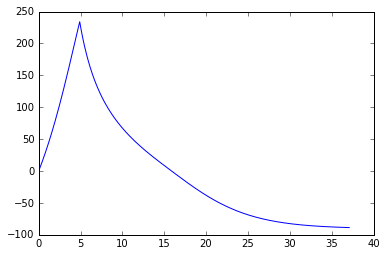

In [8]:
(vmax,index) = max((v,i) for i,v in enumerate(v))

# plotting the graph for t vs v
pyplot.figure
pyplot.plot(t,v)

print ("Maximum velocity: ",vmax, "m/s")
print ("Time at Vmax:", t[index],"s")
print ("Height at vmax:",h[index],"m")

Maximum height:  1363.07967688 m
Time at Hmax: 15.9 s
velocity at vmax: -0.233190966753 m


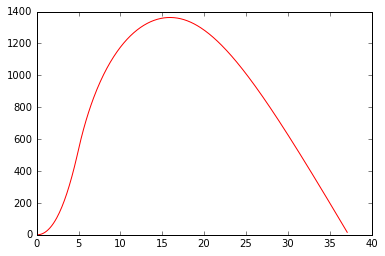

In [9]:
# plotting the graph for t vs h
(hmax,index) = max((h,i) for i,h in enumerate(h))
pyplot.figure
pyplot.plot(t,h, color ='red')
print ("Maximum height: ", hmax,"m")
print ("Time at Hmax:", t[index],"s")
print ("velocity at vmax:",v[index],"m")

In [10]:
print (t[-1],v[-1])

37.1 -88.6717140917
